In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [74]:
af = pd.read_csv("data/dat_MEG_clean.txt", sep=" ")

In [75]:
af.head()

,Subject,Block,hand,Trial,Fan,Length,PairType,acc,RT
0,5,1,RIGHT,2,1,Short,RPFoil,1,2214
1,5,1,RIGHT,3,1,Short,Target,1,1036
2,5,1,RIGHT,4,2,Short,RPFoil,0,1170
3,5,1,RIGHT,5,1,Short,RPFoil,1,1093
4,5,1,RIGHT,6,2,Long,RPFoil,1,2139


Text(0.5,1,'Mean Reaction Time')

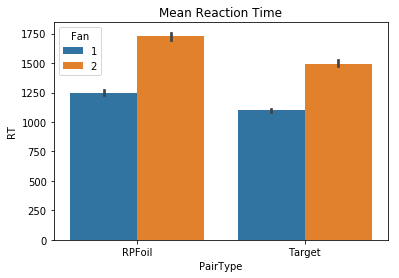

In [82]:
ax = sns.barplot(x="PairType", y="RT", hue="Fan", data=af)
ax.set_title("Mean Reaction Time")

In [87]:
fan1 = af[(af.PairType == "Target") & (af.Fan == 1)].RT.mean()
print("F1 targ", fan1)
foil1 = af[(af.PairType == "RPFoil") & (af.Fan == 1)].RT.mean()
print("F1 foil", foil1)
fan2 = af[(af.PairType == "Target") & (af.Fan == 2)].RT.mean()
print("F2 targ", fan2)
foil2 = af[(af.PairType == "RPFoil") & (af.Fan == 2)].RT.mean()
print("F2 foil", foil2)

F1 targ 1097.3787763391724
F1 foil 1248.414038657172
F2 targ 1495.576923076923
F2 foil 1727.8043972706596


In [48]:
res = af["acc"].groupby([af["Subject"], af["Fan"], af["PairType"]]).apply(lambda g: g.sum()/g.count())

In [63]:
df = pd.DataFrame(res)
df.reset_index(inplace=True)
df['err'] = 1.0-df['acc']
df.head()

,Subject,Fan,PairType,acc,err
0,5,1,RPFoil,0.954751,0.045249
1,5,1,Target,0.972603,0.027397
2,5,2,RPFoil,0.818182,0.181818
3,5,2,Target,0.876147,0.123853
4,9,1,RPFoil,0.990909,0.009091


Text(0.5,1,'Mean per-Subject Error Rate')

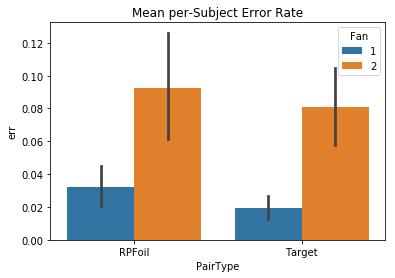

In [84]:
ax = sns.barplot(x="PairType", y="err", hue="Fan", data=df, estimator=np.mean)
ax.set_title("Mean per-Subject Error Rate")

Text(0.5,1,'Standard Deviation of per Subject Error Rate')

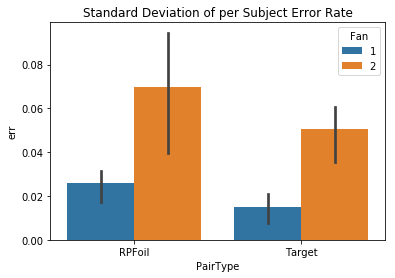

In [85]:
ax = sns.barplot(x="PairType", y="err", hue="Fan", data=df, estimator=np.std)
ax.set_title("Standard Deviation of per Subject Error Rate")

In [88]:
fan1 = df[(df.PairType == "Target") & (df.Fan == 1)].err.mean()
print("F1 targ", fan1)
foil1 = df[(df.PairType == "RPFoil") & (df.Fan == 1)].err.mean()
print("F1 foil", foil1)
fan2 = df[(df.PairType == "Target") & (df.Fan == 2)].err.mean()
print("F2 targ", fan2)
foil2 = df[(df.PairType == "RPFoil") & (df.Fan == 2)].err.mean()
print("F2 foil", foil2)

F1 targ 0.019303038499776937
F1 foil 0.032392073952893875
F2 targ 0.08077027674108023
F2 foil 0.09239550398970675
